# Analysis: Colinearity

Workflow: 1    

Goal: Investigate colinearity of the model's features.   

In [1]:
import pandas as PD
import numpy as NP
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import sklearn.preprocessing as PP
import sklearn.decomposition as DC

import matplotlib.pyplot as MP
import seaborn as SB
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Load Features Data

In [3]:
FEATURE_FILE = '../data/merge_feature.csv'
full_df = PD.read_csv(FEATURE_FILE)
full_df.head()
full_df.info()

,set_no,name,price_store,price_used,aftermarket,popularity,group,year,volume,weight,total_parts,number_parts,number_colors,scolor_1st,scolor_2nd
0,858-1,Auto Engines,NaN,51.0,NaN,9.0,Technical,1980.0,NaN,NaN,242,46,5,Blue,Gray
1,1591-1,Danone Delivery Truck,NaN,28.0,NaN,NaN,Modern day,1980.0,NaN,NaN,40,19,4,White,Blue
2,1592-1,Town Square - Castle Scene,NaN,191.0,NaN,19.2,Modern day,1980.0,NaN,NaN,495,133,10,Black,Yellow
3,1651-2,Maersk Line Container Lorry,NaN,444.0,NaN,5.0,Modern day,1980.0,NaN,NaN,305,66,9,Blue,Gray
4,3634-1,Charlie Crow's Carry-All,NaN,13.0,NaN,3.0,Junior,1980.0,NaN,NaN,18,15,7,Yellow,Green


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 15 columns):
set_no           5303 non-null object
name             5303 non-null object
price_store      4178 non-null float64
price_used       4972 non-null float64
aftermarket      4035 non-null float64
popularity       4560 non-null float64
group            5303 non-null object
year             5303 non-null float64
volume           2143 non-null float64
weight           2154 non-null float64
total_parts      5303 non-null int64
number_parts     5303 non-null int64
number_colors    5303 non-null int64
scolor_1st       5294 non-null object
scolor_2nd       5301 non-null object
dtypes: float64(7), int64(3), object(5)
memory usage: 621.5+ KB


## Investigate Colinearity

In [4]:
# pull out numeric features 

feature_ls = ['year', 'volume', 'weight', 'total_parts', 'number_parts', 'number_colors', ]
feature_df = full_df[feature_ls]

In [5]:
# remove nan's, just for investigation 

feature_df = feature_df.dropna()
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 402 to 5302
Data columns (total 6 columns):
year             2107 non-null float64
volume           2107 non-null float64
weight           2107 non-null float64
total_parts      2107 non-null int64
number_parts     2107 non-null int64
number_colors    2107 non-null int64
dtypes: float64(3), int64(3)
memory usage: 115.2 KB


In [6]:
InteractiveShell.ast_node_interactivity = 'last'

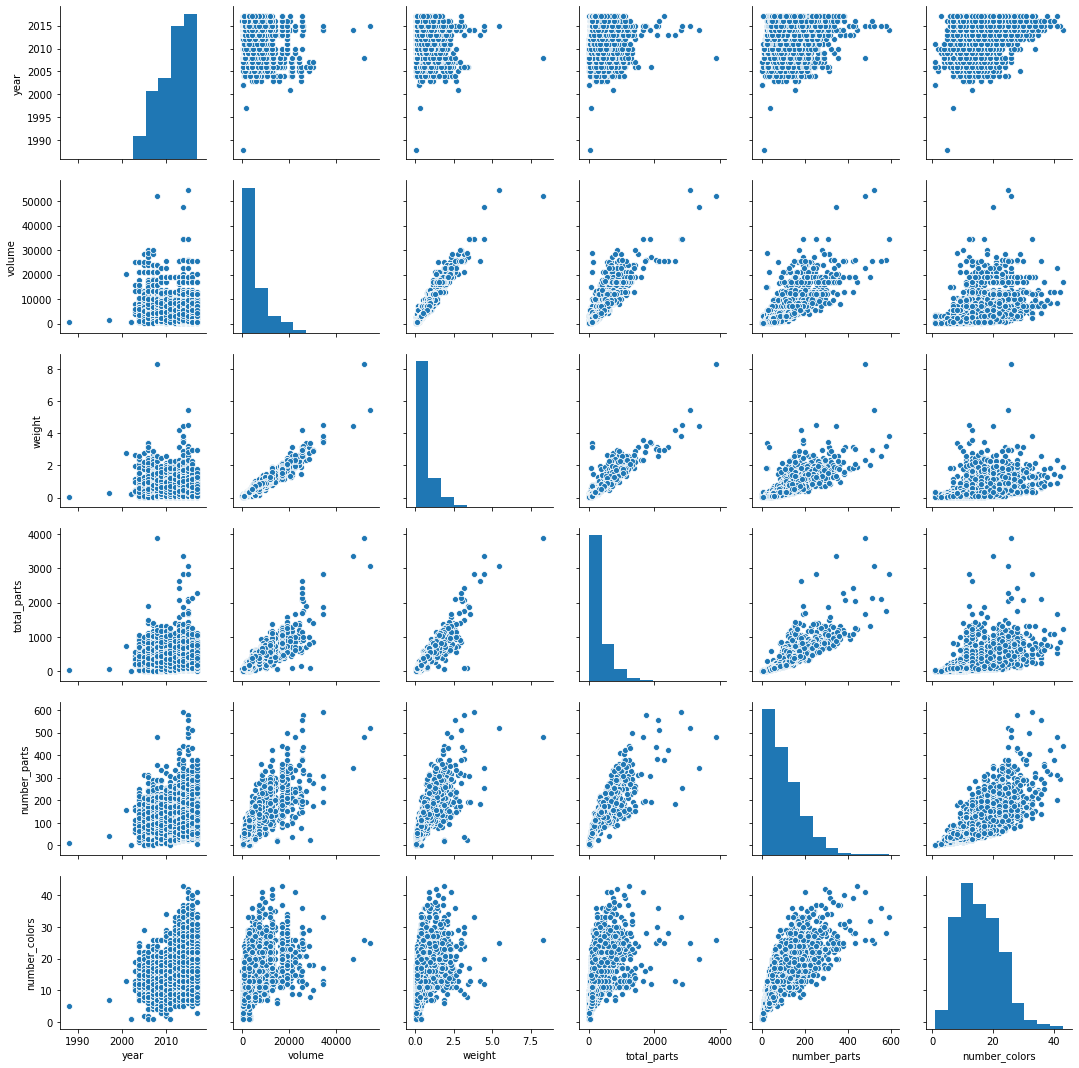

In [7]:
# scatter matrix 

SB.pairplot(feature_df)
MP.show()

In [8]:
# variance inflation factor

vif = [VIF(feature_df.values, i) for i in range(feature_df.shape[1])]
list(zip(feature_df.columns, vif))

[('year', 6.902063810388968),
 ('volume', 29.569403642873677),
 ('weight', 46.17809755268149),
 ('total_parts', 19.712332944907722),
 ('number_parts', 20.684353621517868),
 ('number_colors', 16.540199255466227)]

In [9]:
# remove weight

feature_drop_df = feature_df.drop(columns=['weight'])
vif = [VIF(feature_drop_df.values, i) for i in range(feature_drop_df.shape[1])]
list(zip(feature_drop_df.columns, vif))

[('year', 6.901970029643583),
 ('volume', 9.210337800128428),
 ('total_parts', 12.465246278405765),
 ('number_parts', 20.409796085688715),
 ('number_colors', 16.520966792173752)]

In [10]:
# remove number of parts

feature_drop_df = feature_drop_df.drop(columns=['number_parts'])
vif = [VIF(feature_drop_df.values, i) for i in range(feature_drop_df.shape[1])]
list(zip(feature_drop_df.columns, vif))

[('year', 6.5065440121158815),
 ('volume', 8.791457619884515),
 ('total_parts', 9.248908949091433),
 ('number_colors', 8.530722315672762)]

In [11]:
# remove total_parts

feature_drop_df = feature_drop_df.drop(columns=['total_parts'])
vif = [VIF(feature_drop_df.values, i) for i in range(feature_drop_df.shape[1])]
list(zip(feature_drop_df.columns, vif))

[('year', 6.2788036325615115),
 ('volume', 2.3407453573978296),
 ('number_colors', 7.8143103650807895)]

In [12]:
# standardize features for PCA

scaler = PP.StandardScaler()
scaler.fit(feature_df)
feature_std = scaler.transform(feature_df)

feature_std_df = PD.DataFrame(feature_std, columns=feature_df.columns)
feature_std_df.head()

,year,volume,weight,total_parts,number_parts,number_colors
0,-6.536600,-0.858669,-0.836063,-0.790089,-1.188643,-1.555636
1,-4.091564,-0.665011,-0.472583,-0.714320,-0.843932,-1.261009
2,-3.004881,2.490003,3.430883,1.229453,0.584155,-0.377128
3,-2.733210,-0.861212,-0.583207,-0.895000,-1.311754,-2.144890
4,-2.733210,-0.861212,-0.583207,-0.895000,-1.311754,-2.144890


In [13]:
# check PCA variance ratios 
# this is for the components, not the features
# first 3 components explain 96% of variance

pca = DC.PCA()

principals = pca.fit_transform(feature_std)

pca.explained_variance_ratio_

array([0.66810723, 0.21250102, 0.08049281, 0.02136293, 0.01351272,
       0.00402329])

In [14]:
0.66810723 + 0.21250102 + 0.08049281

0.9611010600000001